Training network for question t07, using this time Pytorch Lightning and Adam optimizer.

In [1]:
import os
import cv2
import numpy as np
import pandas as pd
from torchvision.io import read_image
import torch
from torch.utils.data import Dataset
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
from PIL import Image
from torch.utils.data.sampler import SubsetRandomSampler
import pytorch_lightning as pl

from classes import CustomImageDataset
from lightning_class import CustomDataLoader
from classes import model1
from classes import train_model
from classes import evaluate_model
from lightning_class import model_lightning

c:\Users\ZenBook\Desktop\machine_learning\ML_tools\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
csv_annotations_file = r"t07.csv"
annotations_file=pd.read_csv(csv_annotations_file)

img_dir=r"images"

t07_galaxies = CustomImageDataset (annotations_file , img_dir)


In [3]:
t07_data_loader = CustomDataLoader(32, 0.2, 0.2, t07_galaxies)

train_loader = t07_data_loader.train_loader()
validation_loader=t07_data_loader.validation_loader()
test_loader = t07_data_loader.test_sampler()

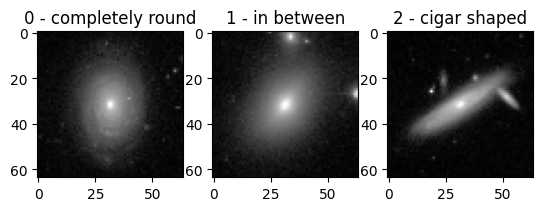

In [4]:
ap_0=0
ap_1=0
ap_2=0

plt.figure(1)

for i in range(len(t07_galaxies)):

   image, label= t07_galaxies.__getitem__(i)

   if label == 0 and ap_0 == 0:
        plt.subplot(1, 3, 1)
        plt.imshow(  image.permute(1, 2, 0), cmap='gray'  )
        plt.title('0 - completely round')
        ap_0 += 1

   if label == 1 and ap_1 == 0:
      plt.subplot(1, 3, 2)
      plt.imshow(  image.permute(1, 2, 0), cmap='gray'  )
      plt.title('1 - in between')
      ap_1 += 1

   if label == 2 and ap_2 == 0:
      plt.subplot(1, 3, 3)
      plt.imshow(  image.permute(1, 2, 0), cmap='gray'  )
      plt.title('2 - cigar shaped')
      ap_2 += 1

   if ap_0 == 1 and ap_1 == 1 and ap_2 == 1:
      break
    

In [5]:
t07_model = model_lightning()
trainer = pl.Trainer(max_epochs=10)

trainer.fit(t07_model, train_loader, validation_loader)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name  | Type      | Params
------------------------------------
0 | conv1 | Conv2d    | 156   
1 | pool  | MaxPool2d | 0     
2 | conv2 | Conv2d    | 2.4 K 
3 | fc1   | Linear    | 324 K 
4 | fc2   | Linear    | 10.2 K
5 | fc3   | Linear    | 255   
------------------------------------
337 K     Trainable params
0         Non-trainable params
337 K     Total params
1.350     Total estimated model params size (MB)


Epoch 5:  69%|██████▊   | 3051/4444 [09:11<04:11,  5.53it/s, loss=0.163, v_num=13] 

c:\Users\ZenBook\Desktop\machine_learning\ML_tools\lib\site-packages\pytorch_lightning\trainer\call.py:48: UserWarning: Detected KeyboardInterrupt, attempting graceful shutdown...
  rank_zero_warn("Detected KeyboardInterrupt, attempting graceful shutdown...")


In [6]:
%load_ext tensorboard
%tensorboard --logdir/lightning_logs

ERROR: Failed to launch TensorBoard (exited with 2).
Contents of stderr:
usage: tensorboard [-h] [--helpfull] [--logdir PATH] [--logdir_spec PATH_SPEC]
                   [--host ADDR] [--bind_all] [--port PORT]
                   [--reuse_port BOOL] [--load_fast {false,auto,true}]
                   [--extra_data_server_flags EXTRA_DATA_SERVER_FLAGS]
                   [--grpc_creds_type {local,ssl,ssl_dev}]
                   [--grpc_data_provider PORT] [--purge_orphaned_data BOOL]
                   [--db URI] [--db_import] [--inspect] [--version_tb]
                   [--tag TAG] [--event_file PATH] [--path_prefix PATH]
                   [--window_title TEXT] [--max_reload_threads COUNT]
                   [--reload_interval SECONDS] [--reload_task TYPE]
                   [--reload_multifile BOOL]
                   [--reload_multifile_inactive_secs SECONDS]
                   [--generic_data TYPE]
                   [--samples_per_plugin SAMPLES_PER_PLUGIN]
                   [-